In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import math
import os

In [95]:
from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(18, 7), "xtick.bottom": True, "grid.linestyle": ":"})

# Preprocessing

In [63]:
PATH = "../data/0603_all"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [64]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\1015052771.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data_in = pd.read_csv(f"{PATH}/{file}")


Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_bitblt_small_7b09114c-6ac9-4f3a-bf32-870c9ea6fbb9.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getdbits_small_454d1363-16c4-47f4-9a8b-f5b7919aedee.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getpixel_small_a5c0ada5-5e93-4a02-a287-e88c5de7ac55.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_none_small_87d762e5-e57f-4df3-baf9-3875e2aa2ce8.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_windup_fullscreen_small_912d64aa-3a74-4059-ac55-f5e529628ce9.csv


### Only use fullscreen data here

In [65]:
data = data[data['fullscreen'] == True]
data = data[data['framework'] != 'glumpy_sdl']
data = data[data['framework'] != 'glumpy_glfw']
data = data[data['framework'] != 'glumpy_qt5']
data = data[data['framework'] != 'glumpy_pyglet']

In [66]:
nones = data[data['program'] == 'none']
runnings = data[data['program'] != 'none']
runnings_cleaned = runnings[runnings['fw'] != -1]
data = pd.concat([nones, runnings_cleaned])

In [67]:
#TODO: find another way for recignizing whether framework was started/has decorations/another issue occurred
data = data[data['ete'] > 200]

data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = -1
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\315882506.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0 - small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'


In [68]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

In [69]:
data_default = data[data['complexity'] == 'default']
data_rects = data[data['complexity'] == 'rects']
data_3D = data[data['complexity'] == '3D']

# End-to-End Latency

## End-to-end latencies over all frameworks

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\2411281320.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.stripplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True, size=2)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\2411281320.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.boxplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True)


Text(0.5, 1.0, 'end-to-end latency for pixel reader')

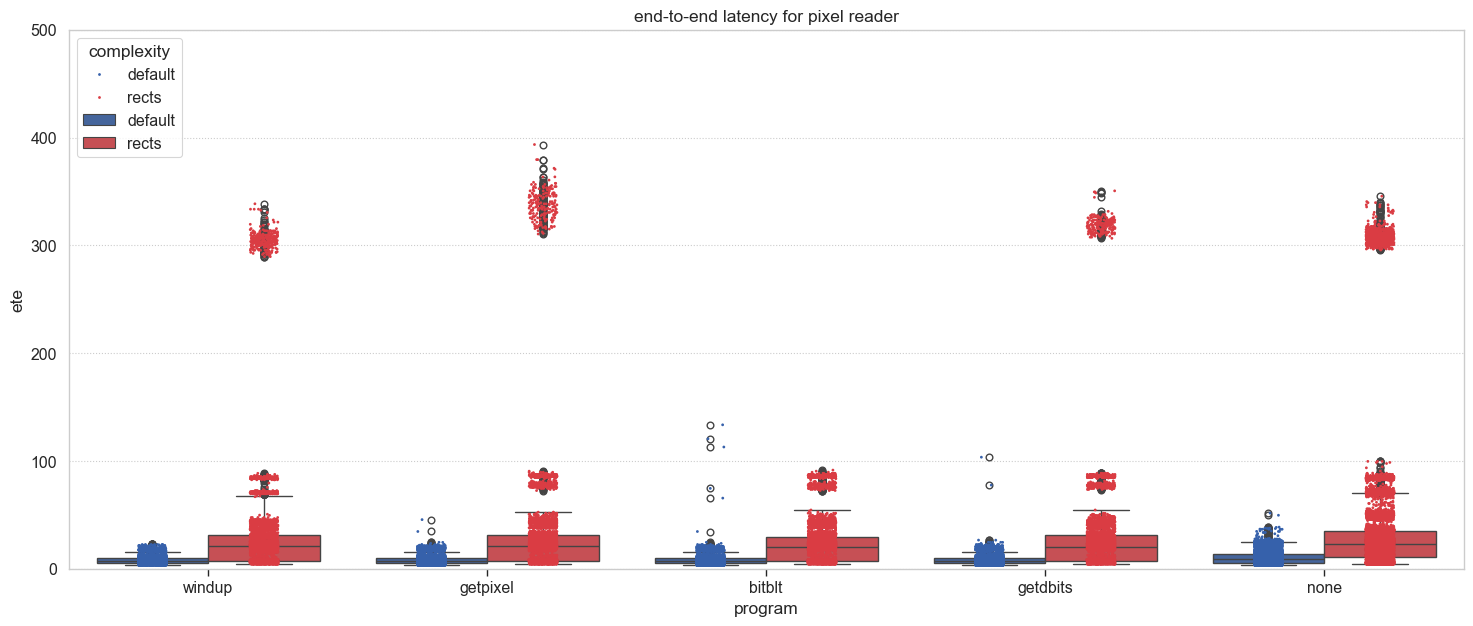

In [85]:
plot = sns.stripplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True, size=2)
plot = sns.boxplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True)
plot.set_ylim(0, 500)
plot.set_title('end-to-end latency for pixel reader')

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\142073588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_W_NREUTRAL_BLUE, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\142073588.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_nfs = sns.boxplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_W_NREUTRAL_RED, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])


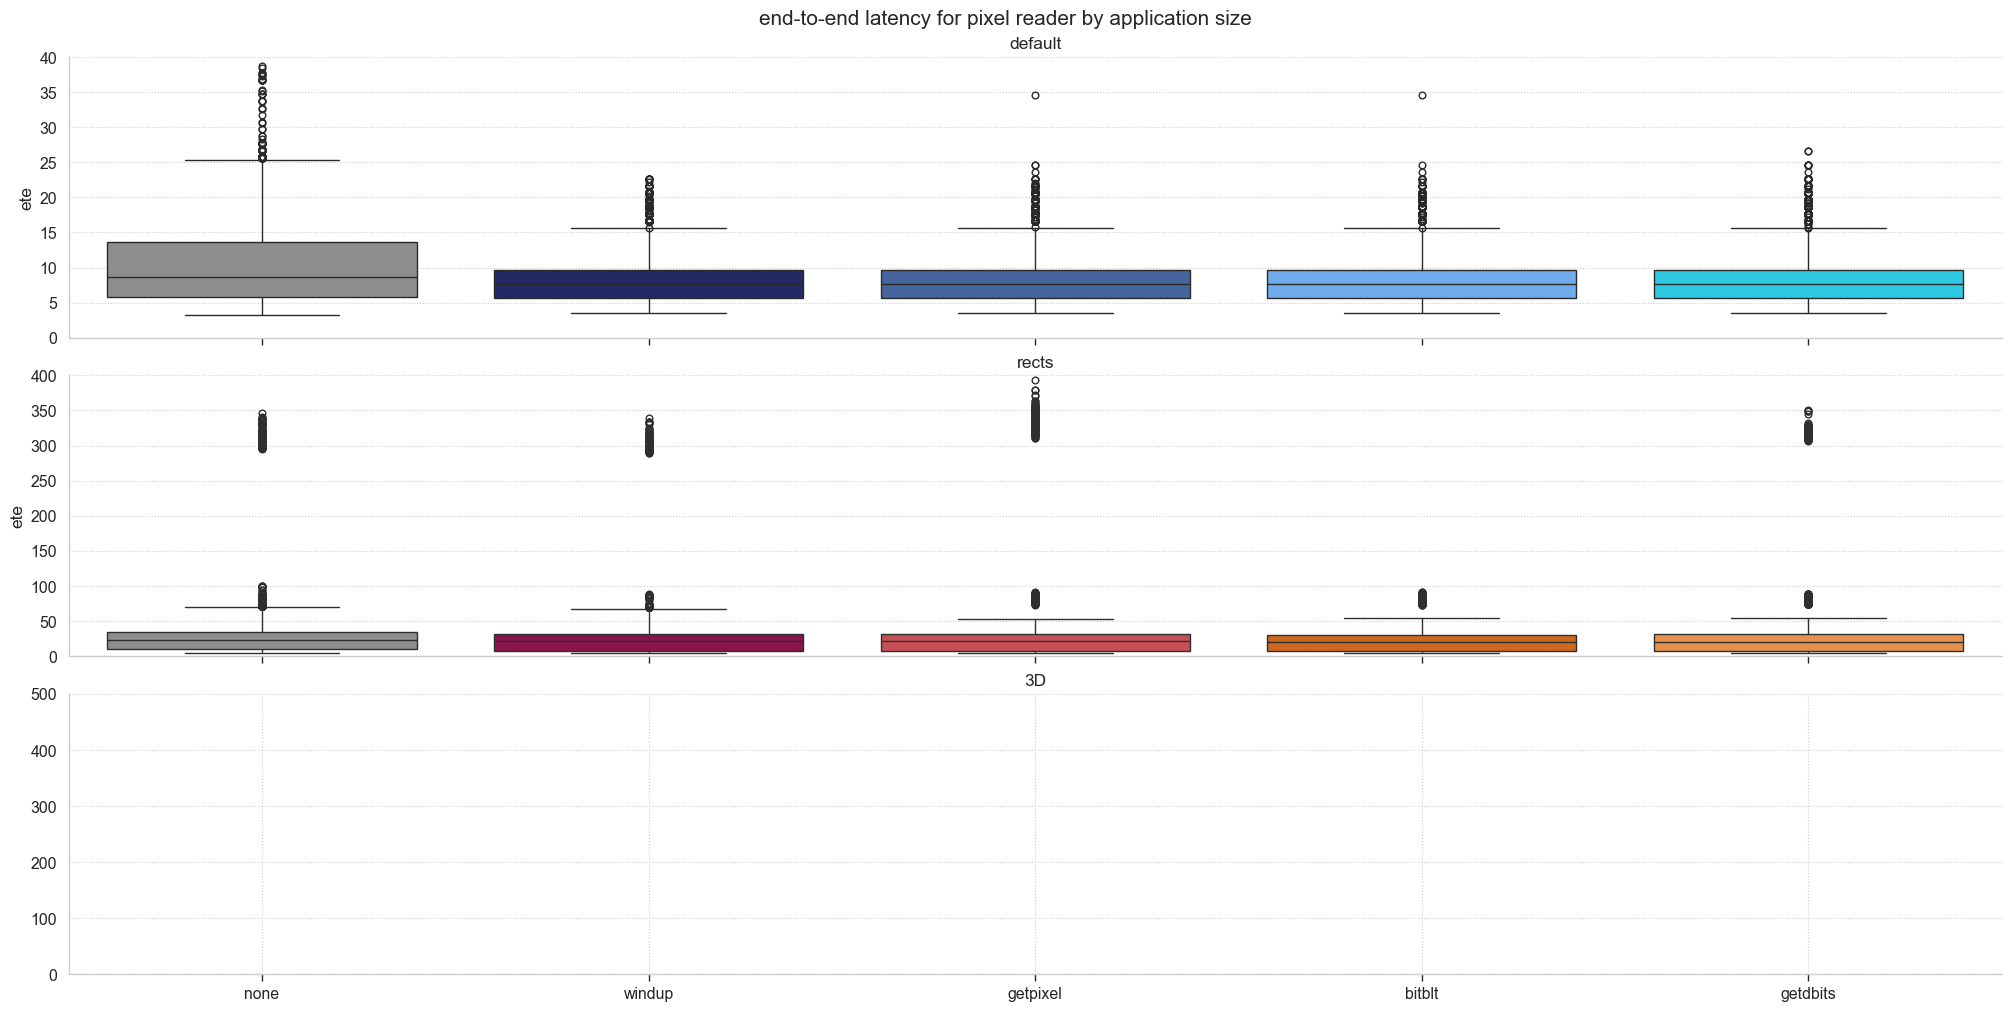

In [97]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, figsize=(20, 10))
fig.suptitle("end-to-end latency for pixel reader by application size")

#plot_fs = sns.stripplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_W_NREUTRAL_BLUE, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_W_NREUTRAL_BLUE, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_fs.set_ylim(0, 40)
plot_fs.set_title('default')

#plot_nfs = sns.stripplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_W_NREUTRAL_RED, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_nfs = sns.boxplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_W_NREUTRAL_RED, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_nfs.set_ylim(0, 400)
plot_nfs.set_title('rects')

#plot_small = sns.stripplot(ax=axs[2], data=data_3D, x='program', y='ete', palette=PALETTE_W_NREUTRAL_GREEN, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_small = sns.boxplot(ax=axs[2], data=data_3D, x='program', y='ete', palette=PALETTE_W_NREUTRAL_GREEN, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_small.set_ylim(0, 500)
plot_small.set_title('3D')

sns.despine(bottom = False, left = False)

## End-to-end latencies for each framework

### frameworks separately

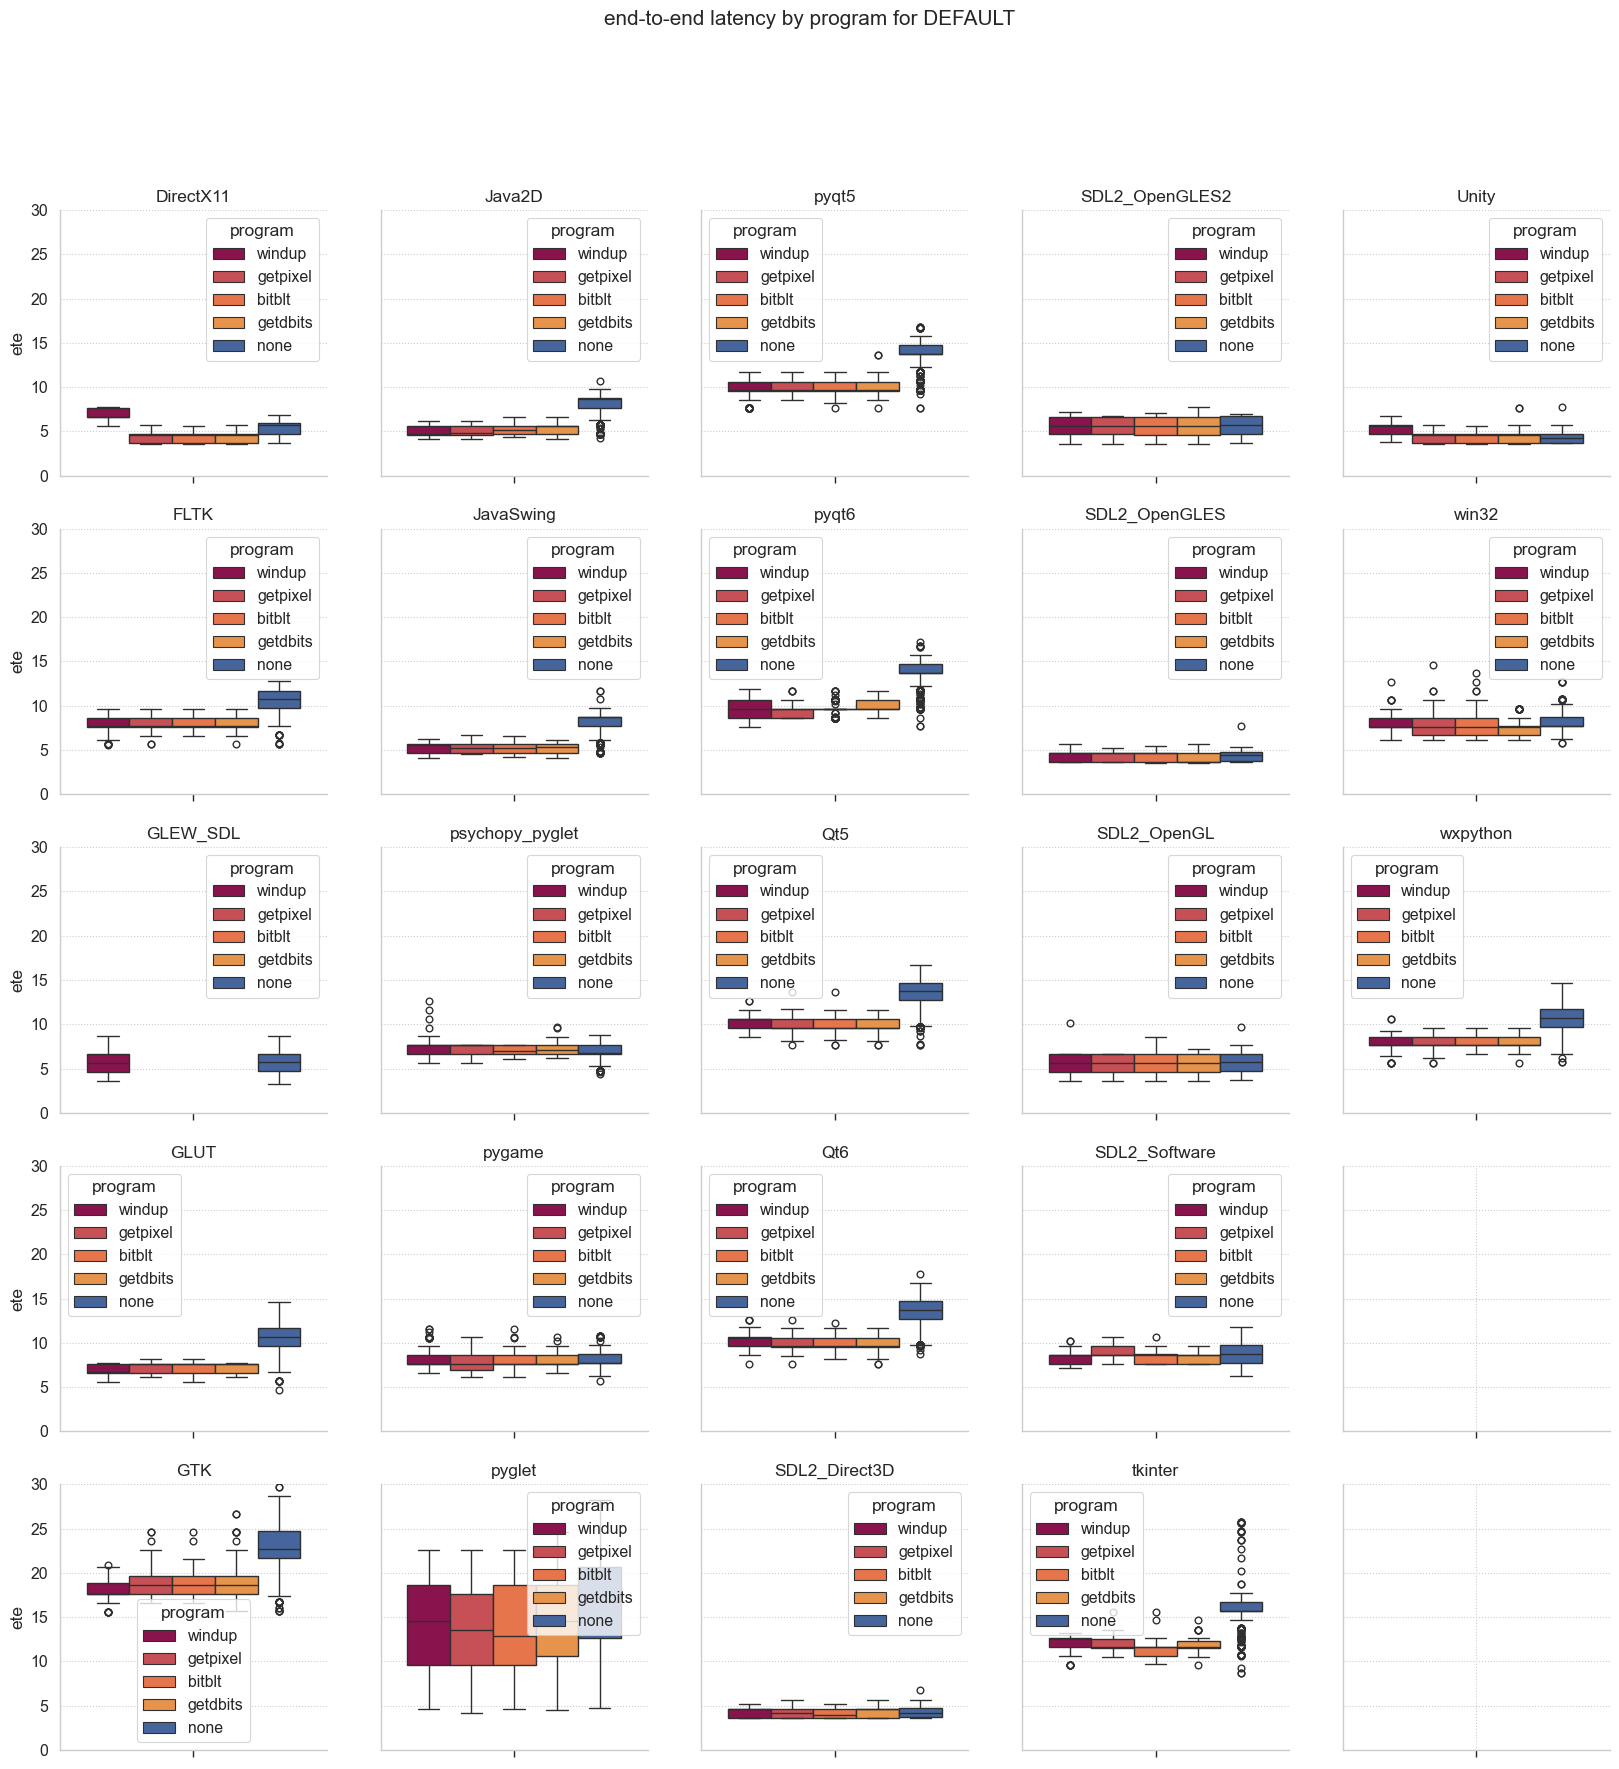

In [72]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for DEFAULT")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_default[data_default['framework'] == framework], y='ete', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], palette=PALETTE_MULTI)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

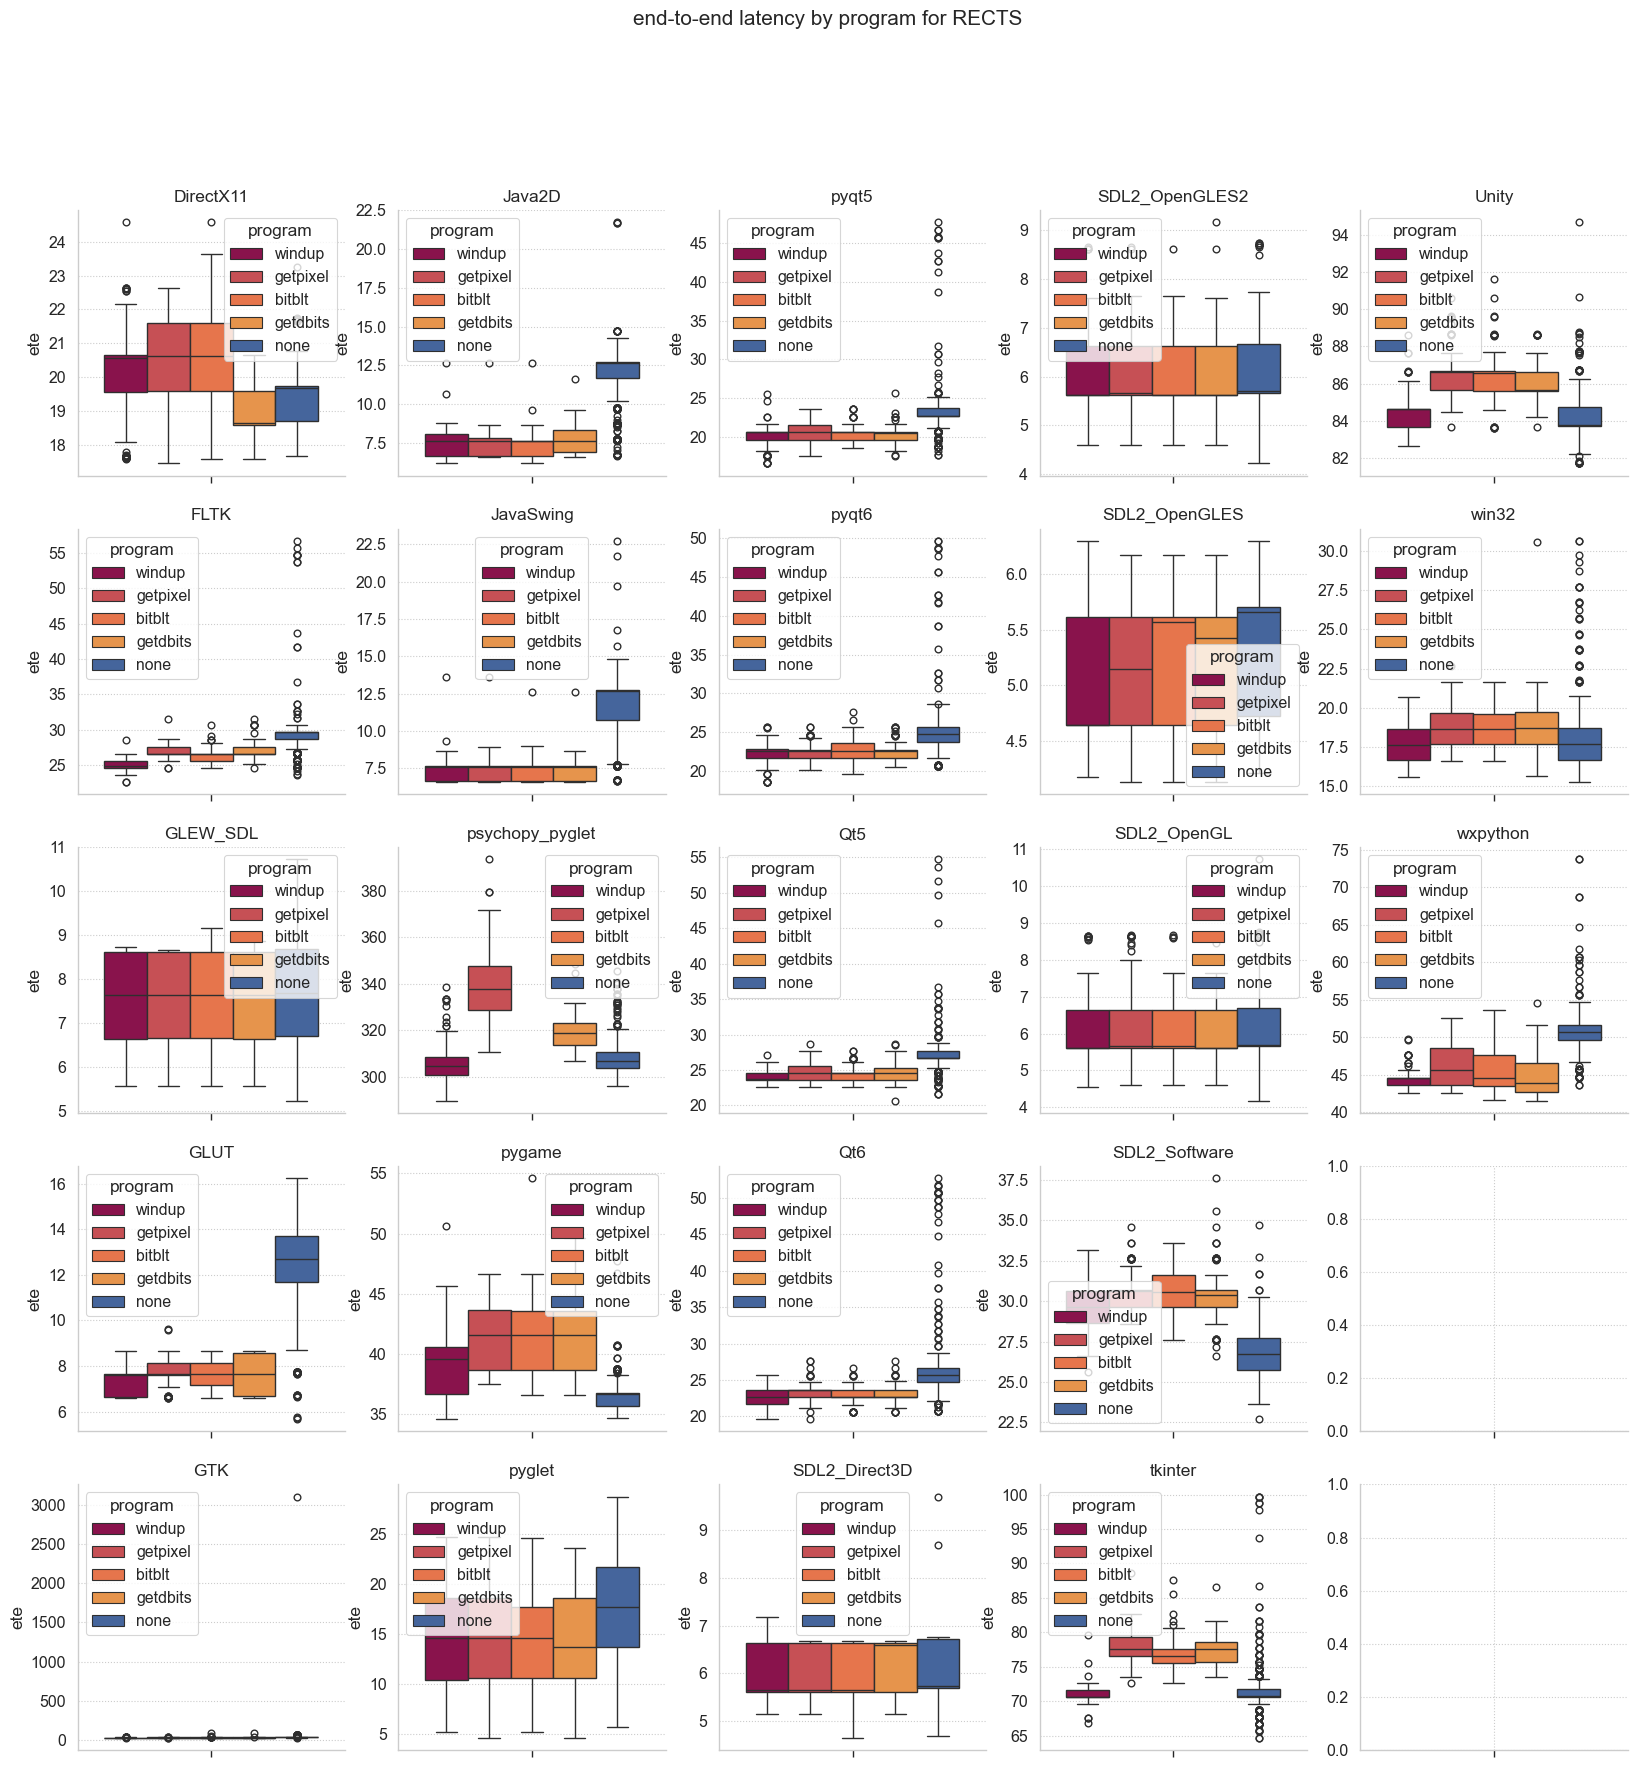

In [73]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True)
fig.suptitle("end-to-end latency by program for RECTS")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_rects[data_rects['framework'] == framework], y='ete', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], palette=PALETTE_MULTI)
    axes[x, y].set_title(framework)
    #axes[x, y].set_ylim(0, 100)

sns.despine(bottom = False, left = False)

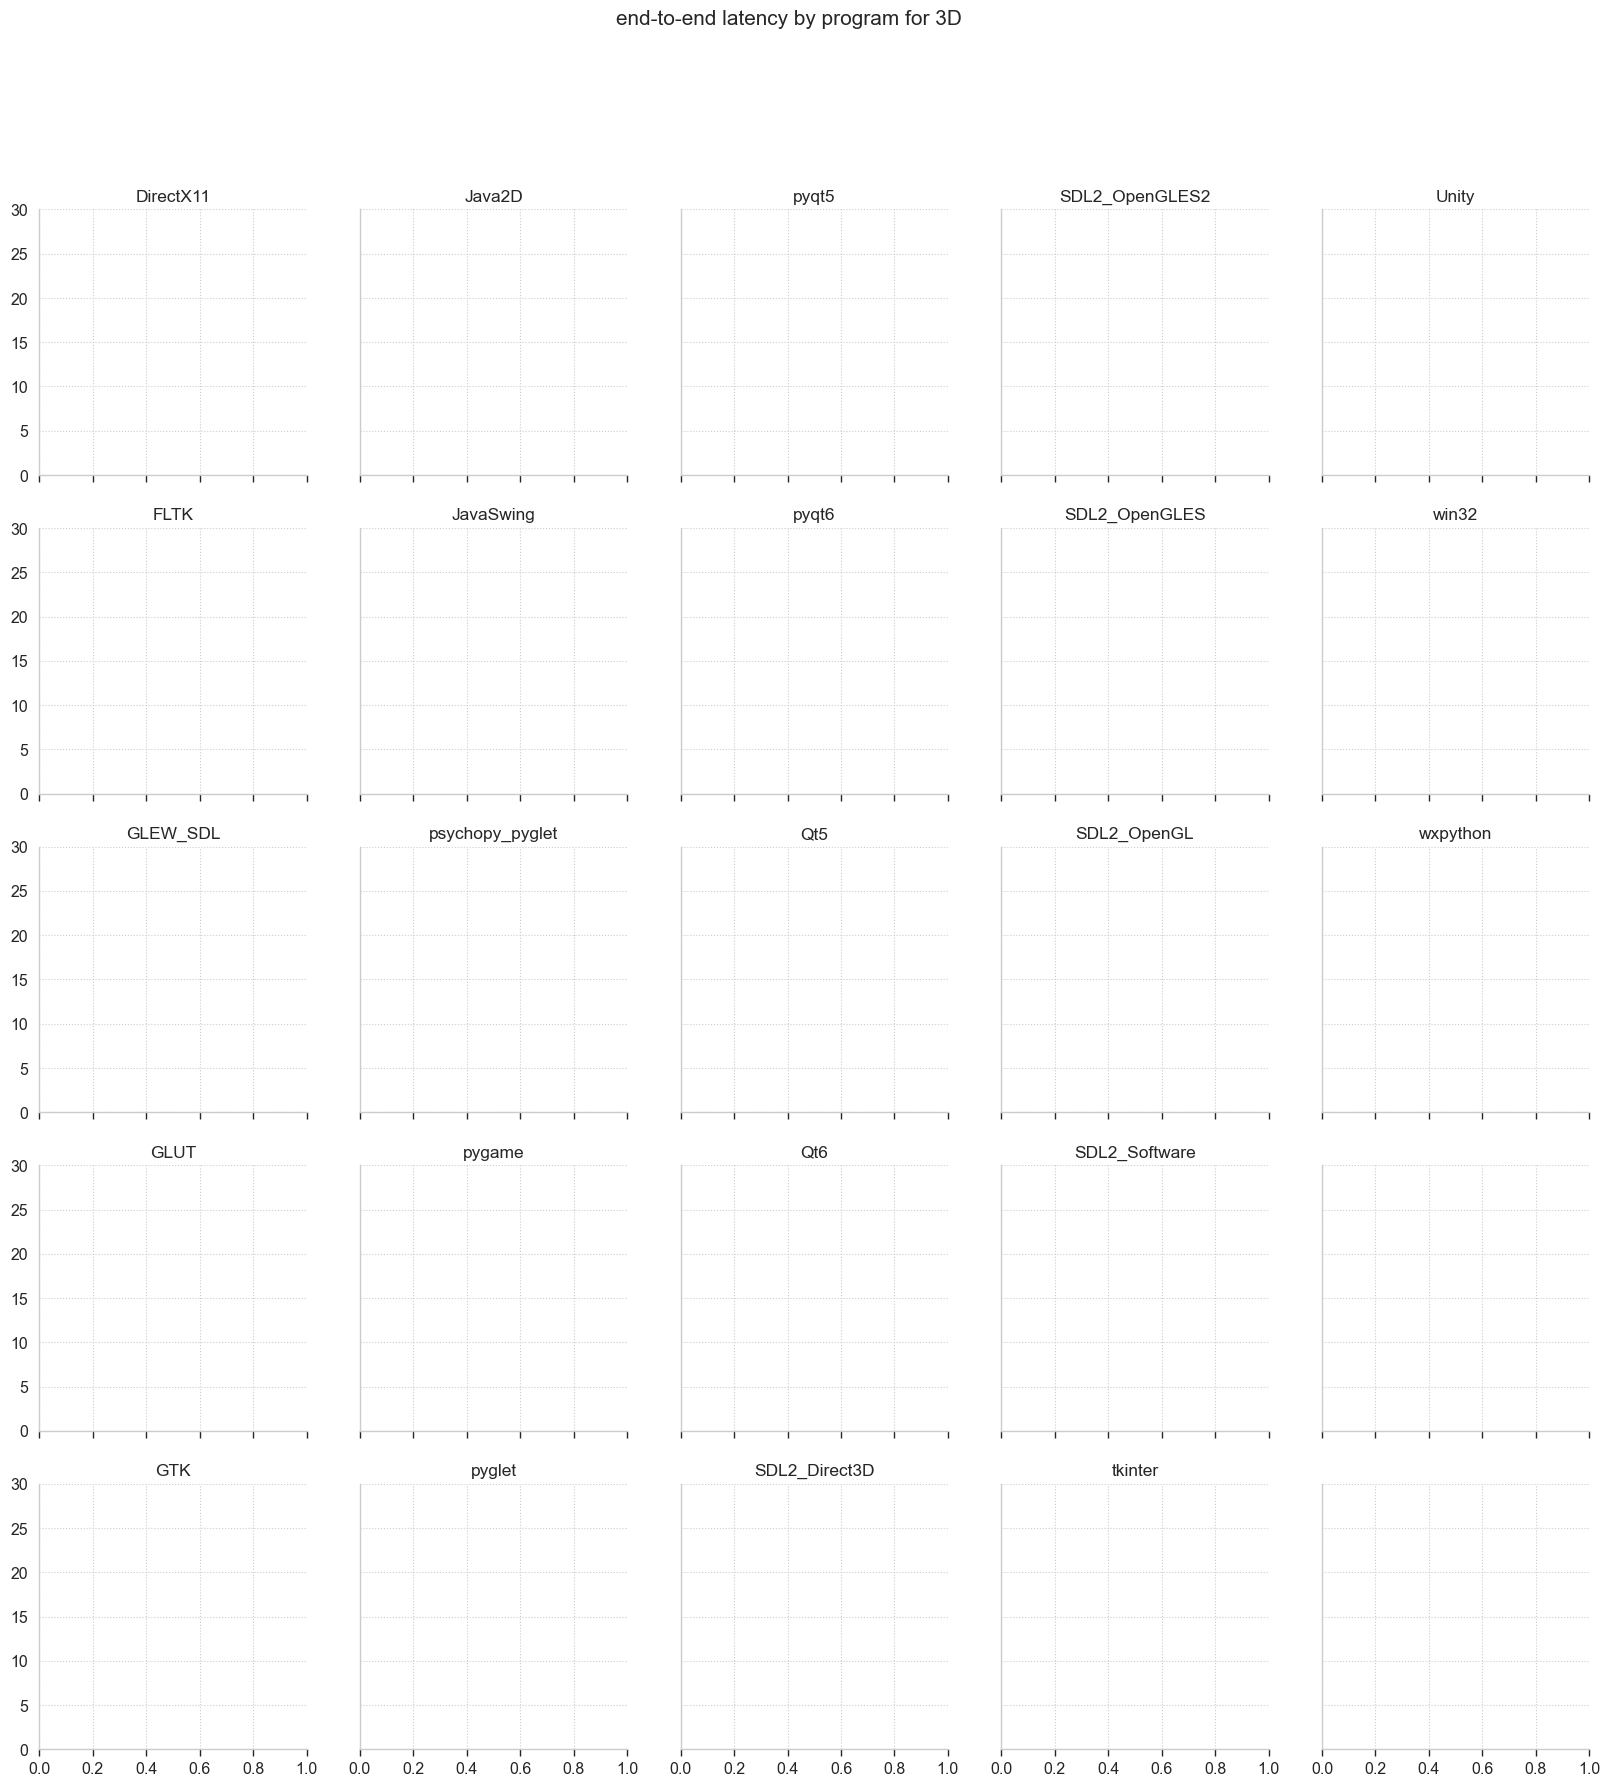

In [74]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for 3D")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_3D[data_3D['framework'] == framework], y='ete', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], palette=PALETTE_MULTI)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

### overview

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\4258043037.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


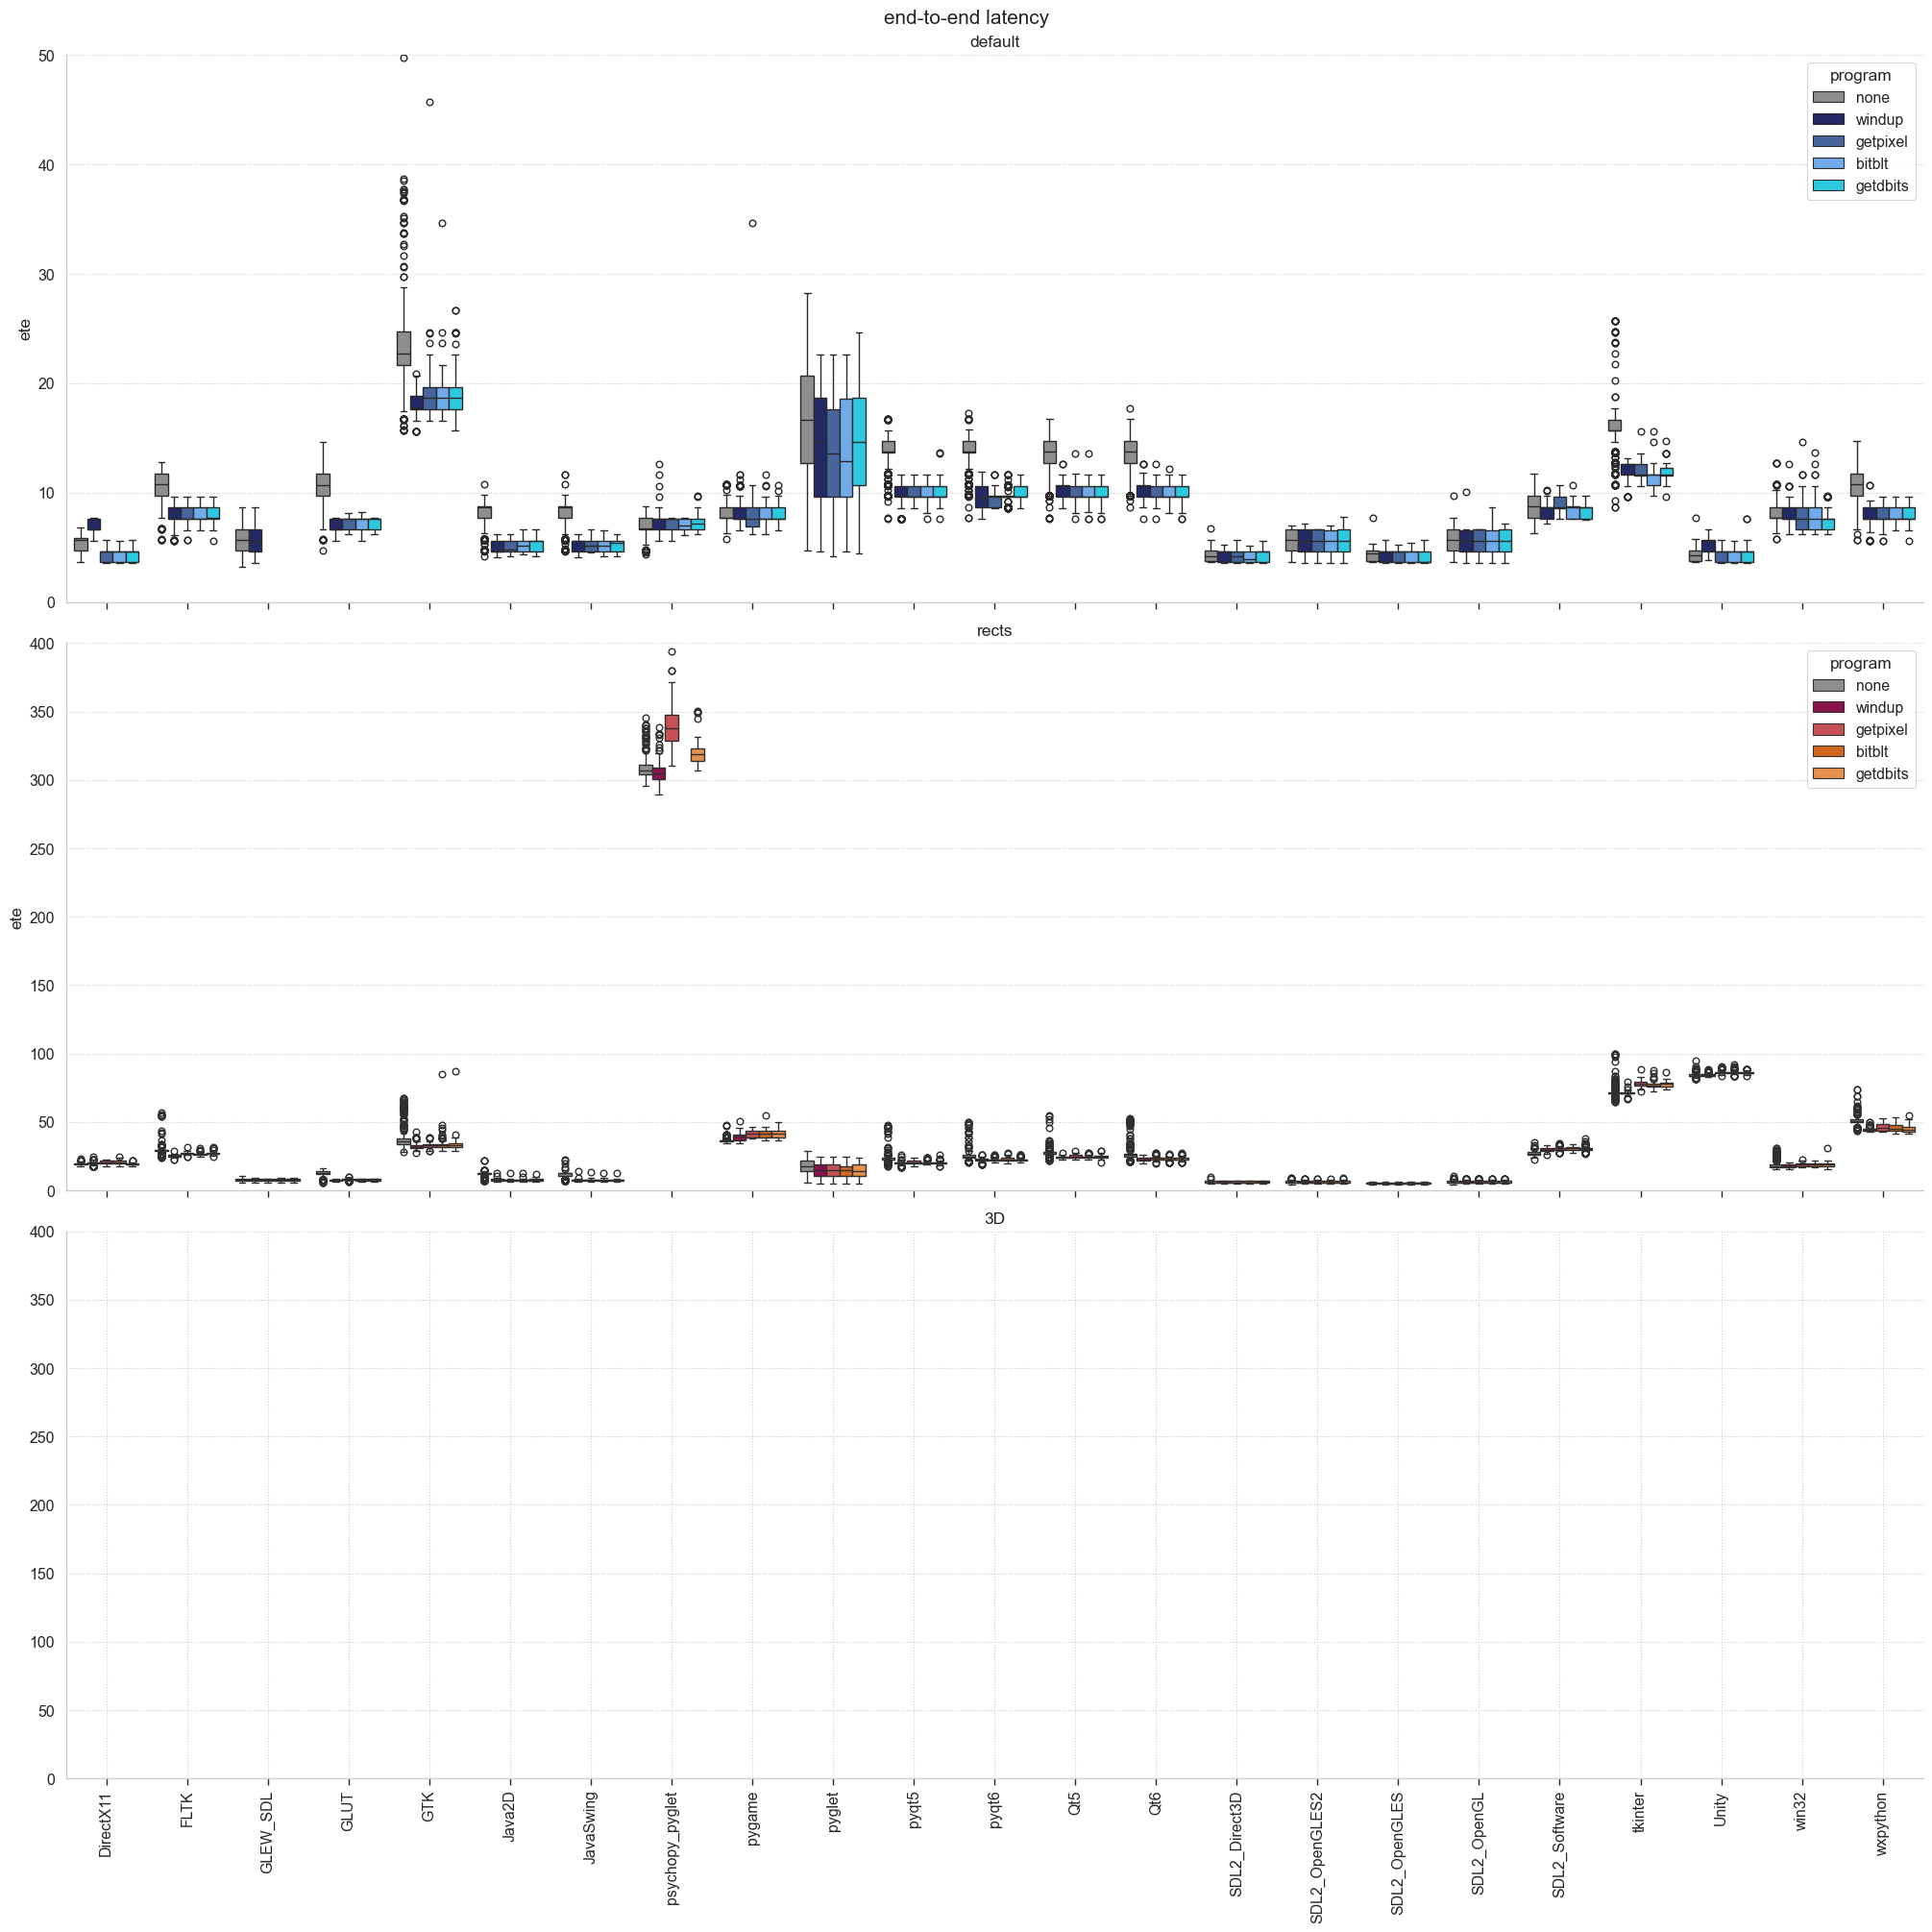

In [90]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.boxplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_W_NREUTRAL_BLUE)
plot_fs.set_title('default')
axs[0].set_ylim(0, 50)

plot_nfs = sns.boxplot(ax=axs[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_W_NREUTRAL_RED)
plot_nfs.set_title('rects')
axs[1].set_ylim(0, 400)

plot_small = sns.boxplot(ax=axs[2], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_W_NREUTRAL_GREEN)
plot_small.set_title('3D')
axs[2].set_ylim(0, 400)

axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\494531558.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


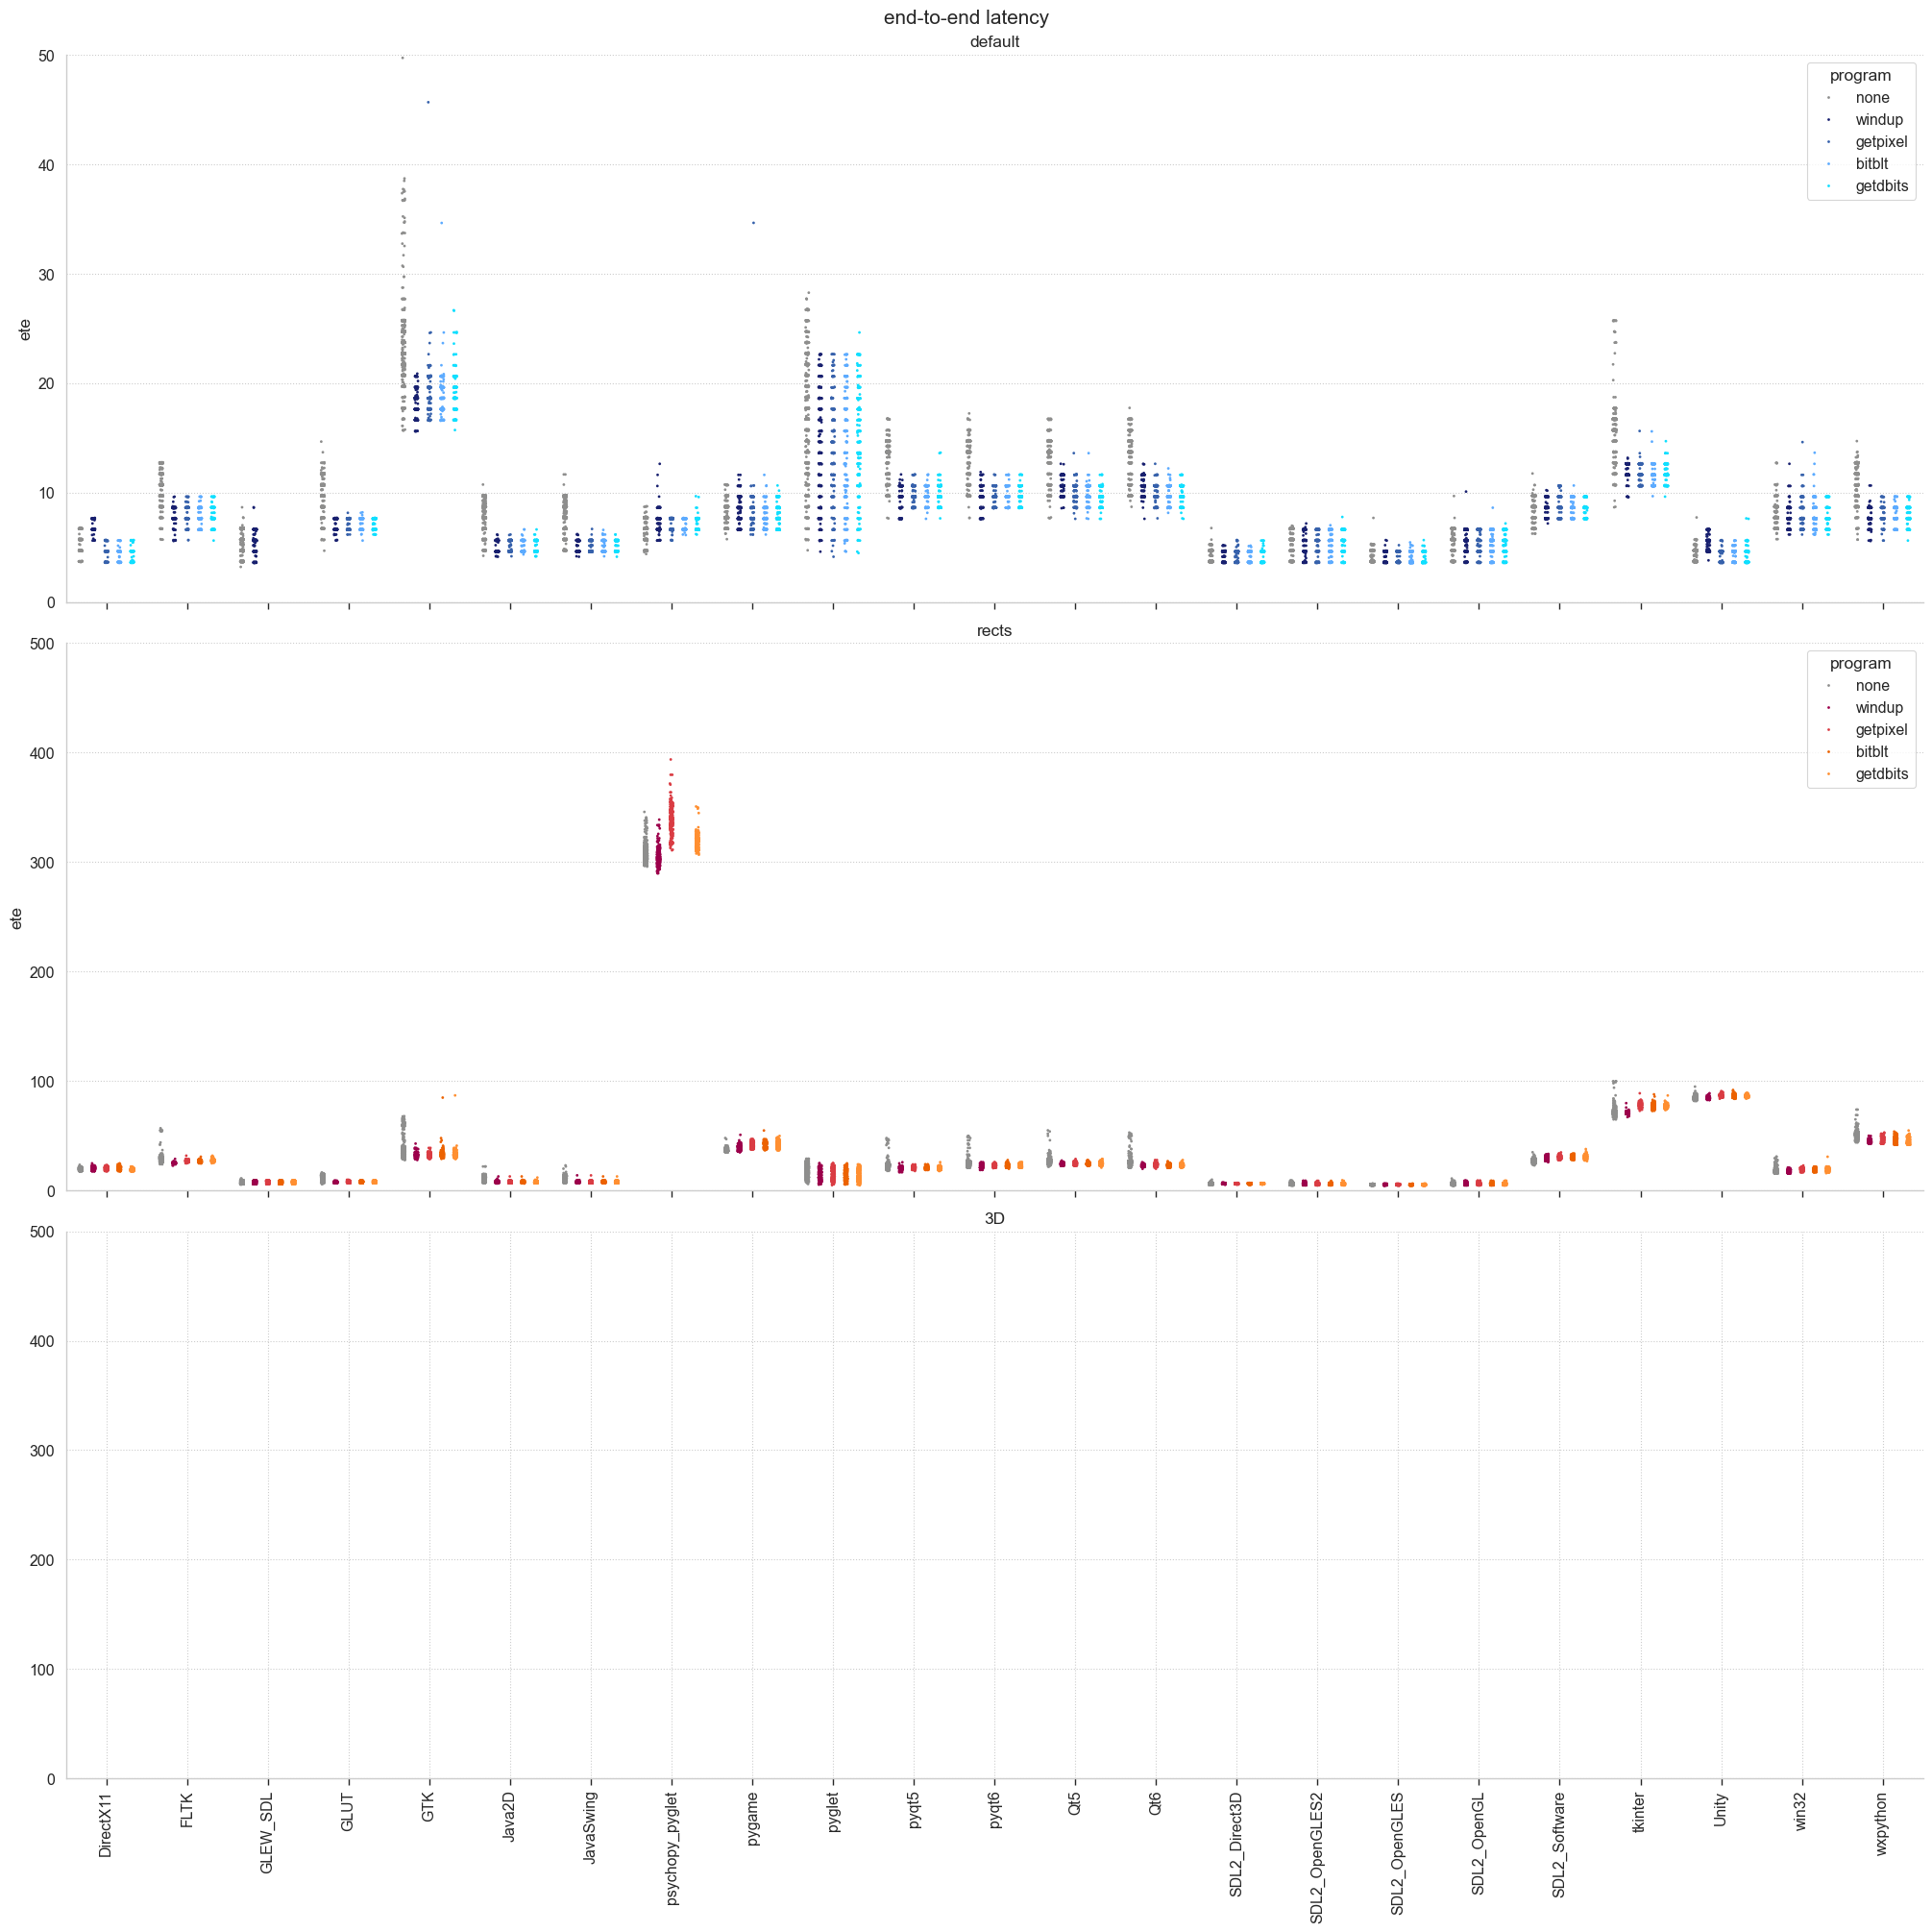

In [92]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.stripplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_W_NREUTRAL_BLUE, size=2)
plot_fs.set_title('default')
axs[0].set_ylim(0, 50)

plot_nfs = sns.stripplot(ax=axs[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_W_NREUTRAL_RED, size=2)
plot_nfs.set_title('rects')
axs[1].set_ylim(0, 500)

plot_small = sns.stripplot(ax=axs[2], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_W_NREUTRAL_GREEN, size=2)
plot_small.set_title('3D')
axs[2].set_ylim(0, 500)

axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

## End-to-end latency: Descriptive Stats

### DEFAULT

In [77]:
data_temp = data_default.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_default_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_default_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,17800.000000,5100.000000,4700.000000,4700.000000,4700.000000
mean,9.836376,8.137612,8.119896,8.167581,8.179270
std,5.061988,3.481336,3.657551,4.770105,4.058604
min,3.208000,3.587000,3.587000,3.545000,3.546000
25%,5.742000,5.616000,5.615000,5.615000,5.615000
50%,8.700000,7.602000,7.642000,7.642000,7.642000
75%,13.640000,9.629000,9.629000,9.629000,9.628000
max,51.702000,22.645000,45.663000,133.602000,103.569000


### RECTS

In [78]:
data_temp = data_rects.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_rects_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_rects_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,18281.000000,5296.000000,5200.000000,4890.000000,5200.000000
mean,37.977792,39.136749,36.127711,23.871011,35.208740
std,65.198337,67.943117,63.782828,20.866764,60.313064
min,4.179000,4.179000,4.136000,4.136000,4.136000
25%,10.726000,7.601000,7.603000,7.600000,7.601000
50%,22.727000,21.583000,21.622000,20.613000,20.617000
75%,34.678000,31.632250,31.184250,29.613000,31.602000
max,3105.964000,338.626000,393.610000,91.614000,350.639000


### 3D

In [79]:
# data_temp = data_3D.copy()

# data_none = data_temp[data_temp['program'] == 'none']
# data_windup = data_temp[data_temp['program'] == 'windup']
# data_getpixel = data_temp[data_temp['program'] == 'getpixel']
# data_bitblt = data_temp[data_temp['program'] == 'bitblt']
# data_getdbits = data_temp[data_temp['program'] == 'getdbits']

#data_3D_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

# display(data_3D_desc.describe())

### OVERALL

In [80]:
data_temp = data.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,36081.000000,10396.000000,9900.000000,9590.000000,9900.000000
mean,24.094662,23.929400,22.831071,16.174856,22.376568
std,48.623897,50.966178,48.359511,17.169275,45.831632
min,3.208000,3.587000,3.587000,3.545000,3.546000
25%,6.714000,6.628000,6.628000,6.628000,6.628000
50%,12.670000,8.656000,8.657000,8.619000,8.658000
75%,23.740000,21.624000,21.632000,20.651000,21.627000
max,3105.964000,338.626000,393.610000,133.602000,350.639000


# Differences

In [81]:
data_running = data[data['program'] != 'none']

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25308\3356589244.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


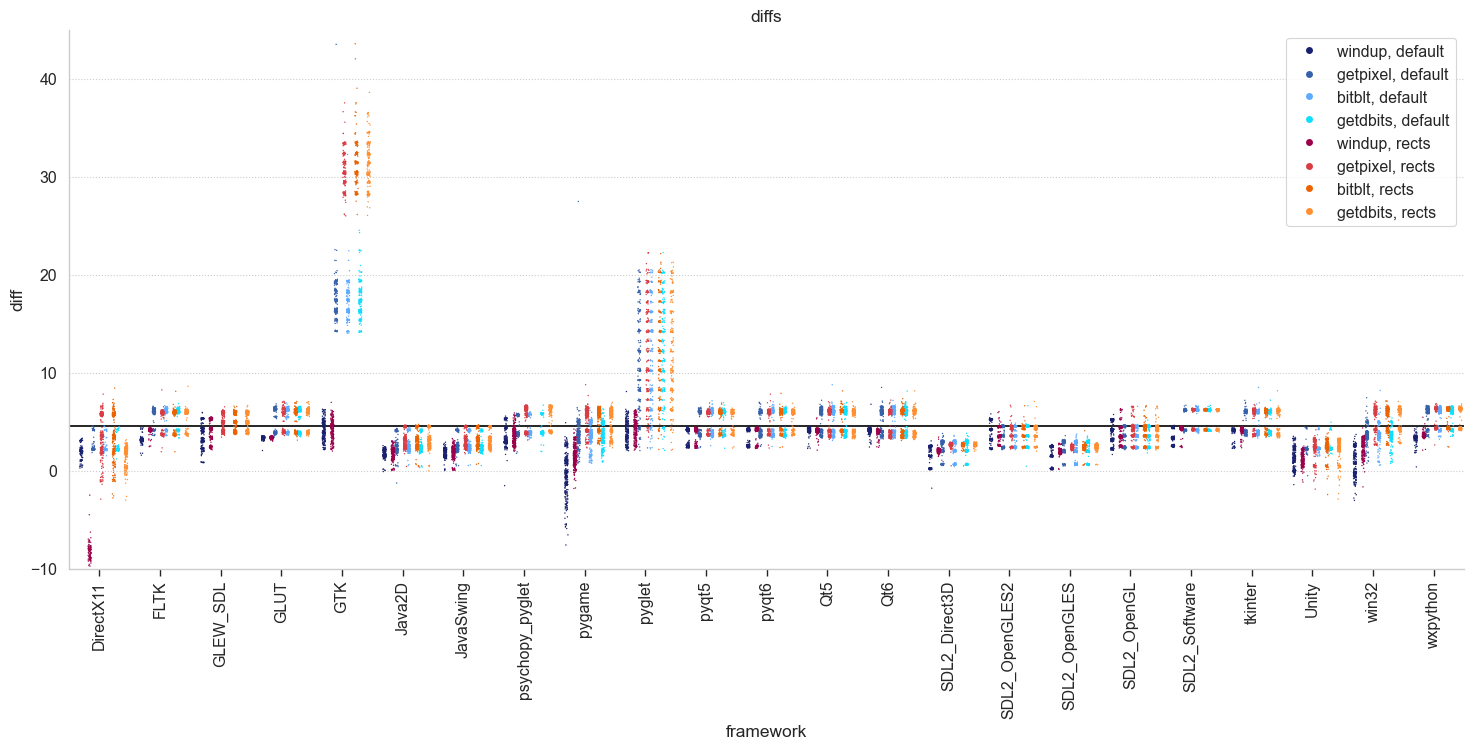

In [94]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_running[data_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, transform=offset(0.1)+trans, size=1)
#sns.stripplot(data=data_running[data_running['complexity'] == '3D'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_GREENS, transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(-10, 45)

agg_mean = round(np.mean(diff_means), 1) / 1000
plt.axhline(agg_mean, color='black')

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
                      labels[2] + ', default', labels[3] + ', default',
                      labels[4] + ', rects', labels[5] + ', rects',
                      labels[6] + ', rects', labels[7] + ', rects'], markerscale=5.)
plot.set_title('diffs')
sns.despine(bottom = False, left = False)

In [83]:
data_temp = data.copy()

data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_desc = pd.concat([data_windup['diff'], data_getpixel['diff'], data_bitblt['diff'], data_getdbits['diff']], axis=1, keys=['windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,windup,getpixel,bitblt,getdbits
count,10396.000000,9900.000000,9590.000000,9900.000000
mean,0.726931,5.439033,5.471286,5.384032
std,126.861887,4.708803,5.351077,5.010287
min,-9451.867000,-2.907000,-2.780000,-3.003000
25%,2.180000,3.328250,3.216000,3.063500
50%,3.344500,4.246000,4.204000,4.150000
75%,4.150000,6.076000,6.093000,6.070250
max,8.074000,43.503000,132.432000,102.273000
